# Trash

In [3]:
pols = pd.read_csv('2020_member_info.csv')

ParserError: Error tokenizing data. C error: Expected 174 fields in line 3231, saw 175


In [28]:
import tweepy
from AppCred import CONSUMER_KEY, CONSUMER_SECRET, ACCESS_TOKEN, ACCESS_TOKEN_SECRET

auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(ACCESS_TOKEN, ACCESS_TOKEN_SECRET)

auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(ACCESS_TOKEN, ACCESS_TOKEN_SECRET)
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [29]:
list_id = 1206514030912901120
list_members = []

for member in tweepy.Cursor(api.list_members, list_id=list_id).items():
    list_members.append(member)

In [ ]:
pols = 

In [37]:
list_members[0]

User(_api=<tweepy.api.API object at 0x0000022B990CA9D0>, _json={'id': 1194759472087998465, 'id_str': '1194759472087998465', 'name': 'Robin Millar', 'screen_name': 'RobinMillarMP', 'location': 'Aberconwy', 'description': '#Conservative MP for #Aberconwy. For statements and local surgery details please see website. Any questions or casework please use robin.millar.mp@parliament.uk', 'url': 'https://t.co/OhN4kGQEP5', 'entities': {'url': {'urls': [{'url': 'https://t.co/OhN4kGQEP5', 'expanded_url': 'http://www.robin-millar.org.uk', 'display_url': 'robin-millar.org.uk', 'indices': [0, 23]}]}, 'description': {'urls': []}}, 'protected': False, 'followers_count': 4070, 'friends_count': 547, 'listed_count': 173, 'created_at': 'Wed Nov 13 23:30:55 +0000 2019', 'favourites_count': 649, 'utc_offset': None, 'time_zone': None, 'geo_enabled': False, 'verified': True, 'statuses_count': 3568, 'lang': None, 'status': {'created_at': 'Tue Jul 26 05:00:18 +0000 2022', 'id': 1551794518000893953, 'id_str': '1

In [40]:
pols = pd.read_excel('mps_uk_2020.xlsx')
pols = pols[pols['country']=='United Kingdom']

In [45]:
pols.to_excel('mps_uk_2020_.xlsx')

# Import data

In [1]:
import pandas as pd
import re as re
import networkx as nx

In [180]:
#tweets = pd.read_json('tweets_flat.json', lines=True, convert_dates=True)
tweets = pd.read_json('conversations_flat.json', lines=True, convert_dates=True, dtype={'id':'str'})
tweets = tweets.drop(['entities', 'reply_settings', 'source', 'possibly_sensitive', 'lang', 'context_annotations', 'attachments', 'geo'], axis=1)

authors = tweets['author'].to_list()
usernames = []
for user in range(len(authors)):
    usernames.append(tweets['author'][user]['username'])
tweets['user'] = usernames

df_sen = pd.read_csv('tweet_sentiment.csv', dtype={'id':'str'})
df_sen = df_sen.sort_values(by=['id'])
tweets = tweets.sort_values(by=['id'])
sen = df_sen['sentiment'].tolist()
tweets['sentiment'] = sen

tweets.head()

,text,public_metrics,in_reply_to_user_id,created_at,id,referenced_tweets,author_id,conversation_id,author,in_reply_to_user,__twarc,withheld,user,sentiment
7362,@cj_dinenage @ChildrensComm @NHSEngland And au...,"{'retweet_count': 6, 'reply_count': 3, 'like_c...",383238347,2019-10-10 13:20:38+00:00,1182284806446551041,"[{'type': 'replied_to', 'id': '118228149622641...",269965177,1182281496226418688,{'profile_image_url': 'https://pbs.twimg.com/p...,{'profile_image_url': 'https://pbs.twimg.com/p...,{'url': 'https://api.twitter.com/2/tweets/sear...,NaN,TwittleyJules,Negative
7005,@cj_dinenage @ChildrensComm @NHSEngland And au...,"{'retweet_count': 6, 'reply_count': 3, 'like_c...",383238347,2019-10-10 13:20:38+00:00,1182284806446551041,"[{'type': 'replied_to', 'id': '118228149622641...",269965177,1182281496226418688,"{'description': 'Mother of sons, writer of stu...","{'description': 'Gosport MP, mum, wife. RT ≠ e...",{'url': 'https://api.twitter.com/2/tweets/sear...,NaN,TwittleyJules,Negative
7361,@TwittleyJules @cj_dinenage @ChildrensComm @NH...,"{'retweet_count': 8, 'reply_count': 3, 'like_c...",269965177,2019-10-10 13:38:36+00:00,1182289327113621506,"[{'type': 'replied_to', 'id': '118228480644655...",331178901,1182281496226418688,{'profile_image_url': 'https://pbs.twimg.com/p...,{'profile_image_url': 'https://pbs.twimg.com/p...,{'url': 'https://api.twitter.com/2/tweets/sear...,NaN,KeeleyMP,Negative
7004,@TwittleyJules @cj_dinenage @ChildrensComm @NH...,"{'retweet_count': 8, 'reply_count': 3, 'like_c...",269965177,2019-10-10 13:38:36+00:00,1182289327113621506,"[{'type': 'replied_to', 'id': '118228480644655...",331178901,1182281496226418688,{'description': 'Labour MP for Worsley & Eccle...,"{'description': 'Mother of sons, writer of stu...",{'url': 'https://api.twitter.com/2/tweets/sear...,NaN,KeeleyMP,Negative
7360,@TwittleyJules @cj_dinenage @ChildrensComm @NH...,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",269965177,2019-10-10 13:41:21+00:00,1182290019698008068,"[{'type': 'replied_to', 'id': '118228480644655...",1095754783191896064,1182281496226418688,{'profile_image_url': 'https://pbs.twimg.com/p...,{'profile_image_url': 'https://pbs.twimg.com/p...,{'url': 'https://api.twitter.com/2/tweets/sear...,NaN,AutismMH,Neutral


In [184]:
before = tweets[tweets["created_at"] <= "2020-01-01 00:00:00+00:00"]
first_wave = tweets[tweets["created_at"].between("2020-01-21 00:00:00+00:00", "2020-09-01 00:00:00+00:00")]
after_first = tweets[tweets["created_at"] >= "2020-09-01 00:00:00+00:00"]

In [185]:
def find_at_word(text):
    word=re.findall(r'(?<=@)\w+',text)
    return ", ".join(word)

tweets['mention']=tweets['text'].apply(lambda x: find_at_word(x))
tweets.head()

,text,public_metrics,in_reply_to_user_id,created_at,id,referenced_tweets,author_id,conversation_id,author,in_reply_to_user,__twarc,withheld,user,sentiment,mention
7362,@cj_dinenage @ChildrensComm @NHSEngland And au...,"{'retweet_count': 6, 'reply_count': 3, 'like_c...",383238347,2019-10-10 13:20:38+00:00,1182284806446551041,"[{'type': 'replied_to', 'id': '118228149622641...",269965177,1182281496226418688,{'profile_image_url': 'https://pbs.twimg.com/p...,{'profile_image_url': 'https://pbs.twimg.com/p...,{'url': 'https://api.twitter.com/2/tweets/sear...,NaN,TwittleyJules,-1,"cj_dinenage, ChildrensComm, NHSEngland"
7005,@cj_dinenage @ChildrensComm @NHSEngland And au...,"{'retweet_count': 6, 'reply_count': 3, 'like_c...",383238347,2019-10-10 13:20:38+00:00,1182284806446551041,"[{'type': 'replied_to', 'id': '118228149622641...",269965177,1182281496226418688,"{'description': 'Mother of sons, writer of stu...","{'description': 'Gosport MP, mum, wife. RT ≠ e...",{'url': 'https://api.twitter.com/2/tweets/sear...,NaN,TwittleyJules,-1,"cj_dinenage, ChildrensComm, NHSEngland"
7361,@TwittleyJules @cj_dinenage @ChildrensComm @NH...,"{'retweet_count': 8, 'reply_count': 3, 'like_c...",269965177,2019-10-10 13:38:36+00:00,1182289327113621506,"[{'type': 'replied_to', 'id': '118228480644655...",331178901,1182281496226418688,{'profile_image_url': 'https://pbs.twimg.com/p...,{'profile_image_url': 'https://pbs.twimg.com/p...,{'url': 'https://api.twitter.com/2/tweets/sear...,NaN,KeeleyMP,-1,"TwittleyJules, cj_dinenage, ChildrensComm, NHS..."
7004,@TwittleyJules @cj_dinenage @ChildrensComm @NH...,"{'retweet_count': 8, 'reply_count': 3, 'like_c...",269965177,2019-10-10 13:38:36+00:00,1182289327113621506,"[{'type': 'replied_to', 'id': '118228480644655...",331178901,1182281496226418688,{'description': 'Labour MP for Worsley & Eccle...,"{'description': 'Mother of sons, writer of stu...",{'url': 'https://api.twitter.com/2/tweets/sear...,NaN,KeeleyMP,-1,"TwittleyJules, cj_dinenage, ChildrensComm, NHS..."
7360,@TwittleyJules @cj_dinenage @ChildrensComm @NH...,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",269965177,2019-10-10 13:41:21+00:00,1182290019698008068,"[{'type': 'replied_to', 'id': '118228480644655...",1095754783191896064,1182281496226418688,{'profile_image_url': 'https://pbs.twimg.com/p...,{'profile_image_url': 'https://pbs.twimg.com/p...,{'url': 'https://api.twitter.com/2/tweets/sear...,NaN,AutismMH,0,"TwittleyJules, cj_dinenage, ChildrensComm, NHS..."


In [186]:
before['mention']=before['text'].apply(lambda x: find_at_word(x))
first_wave['mention']=first_wave['text'].apply(lambda x: find_at_word(x))
after_first['mention']=after_first['text'].apply(lambda x: find_at_word(x))

<ipython-input-186-43faed23c8da>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  before['mention']=before['text'].apply(lambda x: find_at_word(x))
<ipython-input-186-43faed23c8da>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_wave['mention']=first_wave['text'].apply(lambda x: find_at_word(x))
<ipython-input-186-43faed23c8da>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

# Matching usernames to parties

In [6]:
users = pd.read_json('mps_flat.json', lines=True, convert_dates=True)
all_mps = pd.read_excel('mps_uk_2020_.xlsx')
pols = all_mps['uid'].tolist()

In [7]:
all_mps = all_mps.drop_duplicates(subset=['uid'])
df_merge = users.merge(all_mps, right_on='uid', left_on='id', how='inner')
df_merge['party']

0      Conservative
1      Conservative
2      Conservative
3      Conservative
4      Conservative
           ...     
511    Conservative
512    Conservative
513    Conservative
514    Labour Co-op
515    Conservative
Name: party, Length: 516, dtype: object

In [8]:
# Constructing labels for use in Networkx node attributes
labels = zip(df_merge.username, df_merge.party)
labels = dict(labels)

# Sentiment per user

In [181]:
tweets['sentiment'] = tweets['sentiment'].str.replace('Positive', '1')
tweets['sentiment'] = tweets['sentiment'].str.replace('Neutral', '0')
tweets['sentiment'] = tweets['sentiment'].str.replace('Negative', '-1')

tweets['sentiment'] = tweets['sentiment'].astype(int)

In [187]:
sen_users_before = before.groupby('user').mean()
sen_users_first = first_wave.groupby('user').mean()
sen_users_after = after_first.groupby('user').mean()

In [196]:
sen_users_after.head()

,in_reply_to_user_id,author_id,conversation_id,sentiment
user,,,,
001_LDN,6.777180e+17,1.168296e+18,1.335487e+18,-0.666667
0079Ibrahim,2.005290e+07,1.431128e+18,1.503116e+18,0.000000
007iKb,1.068600e+18,9.899555e+17,1.336204e+18,-1.000000
00Olmolungring,2.005290e+07,2.872229e+07,1.505513e+18,-1.000000
00adam,7.415463e+17,2.200306e+07,1.335487e+18,-1.000000


In [193]:
# Constructing labels for use in Networkx node attributes
sentiment_dict_before = zip(sen_users_before.index, sen_users_before.sentiment)
sentiment_dict_before = dict(sentiment_dict_before)

sentiment_dict_first = zip(sen_users_first.index, sen_users_first.sentiment)
sentiment_dict_first = dict(sentiment_dict_first)

sentiment_dict_after= zip(sen_users_after.index, sen_users_after.sentiment)
sentiment_dict_after = dict(sentiment_dict_after)

# Generating mention networks

## Before pandemic

In [197]:
users = before['user'].tolist()
mentions = before['mention'].tolist()

In [198]:
# Creating adjadency list for network graph cration
adj_list = [] 

for i in range(len(users)):
    adj_list.append(users[i]+' '+mentions[i].replace(',',' '))

adj_list[53]

'Starchild65 KirstenPeebles  cj_dinenage  ChildrensComm  NHSEngland'

In [199]:
# Writing adjacency list to textfile

textfile = open("before_adjlist.txt", "w")

for element in adj_list:
    textfile.write(element + "\n")
textfile.close()

In [200]:
# Importing adjacency list to directed graph
G = nx.Graph()
G = nx.read_adjlist('before_adjlist.txt', create_using = nx.DiGraph())
nx.set_node_attributes(G, labels, "party")
nx.set_node_attributes(G, sentiment_dict_before, "sentiment")

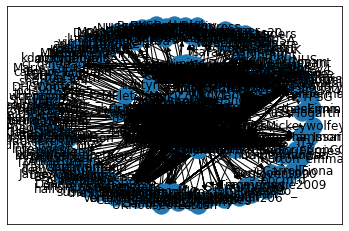

In [201]:
nx.draw_networkx(G)

In [202]:
nx.write_gexf(G, 'mention_before_network.gexf')

## First wave

In [203]:
users = first_wave['user'].tolist()
mentions = first_wave['mention'].tolist()

In [204]:
# Creating adjadency list for network graph cration
adj_list = [] 

for i in range(len(users)):
    adj_list.append(users[i]+' '+mentions[i].replace(',',' '))

adj_list[53]

'GarryDoolan2552 justinmadders  NHSEngland'

In [205]:
# Writing adjacency list to textfile
textfile = open("first_wave_adjlist.txt", "w")

for element in adj_list:
    textfile.write(element + "\n")
textfile.close()

In [206]:
# Importing adjacency list to directed graph
G = nx.Graph()
G = nx.read_adjlist('first_wave_adjlist.txt', create_using = nx.DiGraph())
nx.set_node_attributes(G, labels, "party")
nx.set_node_attributes(G, sentiment_dict_first, "sentiment")

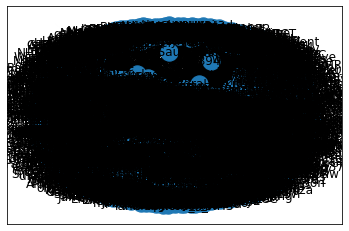

In [207]:
nx.draw_networkx(G)

In [208]:
nx.write_gexf(G, 'mention_first_wave_network.gexf')

## After first wave

In [209]:
users = after_first['user'].tolist()
mentions = after_first['mention'].tolist()

In [210]:
# Creating adjadency list for network graph cration
adj_list = [] 
for i in range(len(users)):
    adj_list.append(users[i]+' '+mentions[i].replace(',',' '))
adj_list[53]

'Bec_j87 aliciakearns  NHSEngland  PregnantScrewed  AVMikhailova  BetterBirth1  RWT_NHS'

In [211]:
# Writing adjacency list to textfile

textfile = open("after_first_adjlist.txt", "w")

for element in adj_list:
    textfile.write(element + "\n")
textfile.close()

In [212]:
# Importing adjacency list to directed graph
G = nx.Graph()
G = nx.read_adjlist('after_first_adjlist.txt', create_using = nx.DiGraph())
nx.set_node_attributes(G, labels, "party")
nx.set_node_attributes(G, sentiment_dict_after, "sentiment")

In [ ]:
nx.draw_networkx(G)

In [ ]:
nx.write_gexf(G, 'mention_after_first_network.gexf')

# Generating reply networks

In [40]:
df_replies = tweets[tweets['in_reply_to_user'].notna()]

In [54]:
df_replies.head()

,text,public_metrics,in_reply_to_user_id,created_at,id,referenced_tweets,author_id,conversation_id,author,in_reply_to_user,__twarc,withheld,user,mention,is_retweet
0,@RobinMillarMP @AlyAShields @BetsiCadwaladr @h...,"{'retweet_count': 2, 'reply_count': 0, 'like_c...",1194759472087998464,2020-10-09 12:17:15+00:00,1314540427874308096,"[{'type': 'replied_to', 'id': '131449302570007...",709375301583835136,1314477726678614016,{'description': 'Raising awareness for PANS Pa...,"{'entities': {'url': {'urls': [{'start': 0, 'e...",{'url': 'https://api.twitter.com/2/tweets/sear...,NaN,kathryn_gillett,"RobinMillarMP, AlyAShields, BetsiCadwaladr, he...",nan
1,@RobinMillarMP @BetsiCadwaladr @healthdpt @NIC...,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",1194759472087998464,2020-10-09 11:49:31+00:00,1314533448405614592,"[{'type': 'replied_to', 'id': '131449302570007...",470801601,1314477726678614016,{'entities': {'description': {'urls': [{'start...,"{'entities': {'url': {'urls': [{'start': 0, 'e...",{'url': 'https://api.twitter.com/2/tweets/sear...,NaN,AlyAShields,"RobinMillarMP, BetsiCadwaladr, healthdpt, NICE...",nan
2,@RobinMillarMP @AlyAShields @BetsiCadwaladr @h...,"{'retweet_count': 4, 'reply_count': 0, 'like_c...",1194759472087998464,2020-10-09 10:12:43+00:00,1314509086596239360,"[{'type': 'replied_to', 'id': '131449302570007...",816444807371517952,1314477726678614016,"{'entities': {'url': {'urls': [{'start': 0, 'e...","{'entities': {'url': {'urls': [{'start': 0, 'e...",{'url': 'https://api.twitter.com/2/tweets/sear...,NaN,soniaserrano0,"RobinMillarMP, AlyAShields, BetsiCadwaladr, he...",nan
3,@AlyAShields @BetsiCadwaladr @healthdpt @NICEC...,"{'retweet_count': 8, 'reply_count': 3, 'like_c...",470801601,2020-10-09 09:08:54+00:00,1314493025700077568,"[{'type': 'replied_to', 'id': '131447772937129...",1194759472087998464,1314477726678614016,"{'entities': {'url': {'urls': [{'start': 0, 'e...",{'entities': {'description': {'urls': [{'start...,{'url': 'https://api.twitter.com/2/tweets/sear...,NaN,RobinMillarMP,"AlyAShields, BetsiCadwaladr, healthdpt, NICECo...",nan
4,@BetsiCadwaladr @CALL_247 @MindCymru @Research...,"{'retweet_count': 4, 'reply_count': 1, 'like_c...",470801601,2020-10-09 08:08:07+00:00,1314477729371299840,"[{'type': 'replied_to', 'id': '131447772667861...",470801601,1314477726678614016,{'entities': {'description': {'urls': [{'start...,{'entities': {'description': {'urls': [{'start...,{'url': 'https://api.twitter.com/2/tweets/sear...,NaN,AlyAShields,"BetsiCadwaladr, CALL_247, MindCymru, ResearchW...",nan


In [62]:
replies = df_replies['in_reply_to_user'].tolist()

tweet_type = []
for user in range(len(replies)):
    try:
        tweet_type.append(replies[user]['username'])
    except:
        tweet_type.append('nan')
df_replies['reply_to_user'] = tweet_type

In [63]:
df_replies.head()

,text,public_metrics,in_reply_to_user_id,created_at,id,referenced_tweets,author_id,conversation_id,author,in_reply_to_user,__twarc,withheld,user,mention,is_retweet,reply_to_user
0,@RobinMillarMP @AlyAShields @BetsiCadwaladr @h...,"{'retweet_count': 2, 'reply_count': 0, 'like_c...",1194759472087998464,2020-10-09 12:17:15+00:00,1314540427874308096,"[{'type': 'replied_to', 'id': '131449302570007...",709375301583835136,1314477726678614016,{'description': 'Raising awareness for PANS Pa...,"{'entities': {'url': {'urls': [{'start': 0, 'e...",{'url': 'https://api.twitter.com/2/tweets/sear...,NaN,kathryn_gillett,"RobinMillarMP, AlyAShields, BetsiCadwaladr, he...",nan,RobinMillarMP
1,@RobinMillarMP @BetsiCadwaladr @healthdpt @NIC...,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",1194759472087998464,2020-10-09 11:49:31+00:00,1314533448405614592,"[{'type': 'replied_to', 'id': '131449302570007...",470801601,1314477726678614016,{'entities': {'description': {'urls': [{'start...,"{'entities': {'url': {'urls': [{'start': 0, 'e...",{'url': 'https://api.twitter.com/2/tweets/sear...,NaN,AlyAShields,"RobinMillarMP, BetsiCadwaladr, healthdpt, NICE...",nan,RobinMillarMP
2,@RobinMillarMP @AlyAShields @BetsiCadwaladr @h...,"{'retweet_count': 4, 'reply_count': 0, 'like_c...",1194759472087998464,2020-10-09 10:12:43+00:00,1314509086596239360,"[{'type': 'replied_to', 'id': '131449302570007...",816444807371517952,1314477726678614016,"{'entities': {'url': {'urls': [{'start': 0, 'e...","{'entities': {'url': {'urls': [{'start': 0, 'e...",{'url': 'https://api.twitter.com/2/tweets/sear...,NaN,soniaserrano0,"RobinMillarMP, AlyAShields, BetsiCadwaladr, he...",nan,RobinMillarMP
3,@AlyAShields @BetsiCadwaladr @healthdpt @NICEC...,"{'retweet_count': 8, 'reply_count': 3, 'like_c...",470801601,2020-10-09 09:08:54+00:00,1314493025700077568,"[{'type': 'replied_to', 'id': '131447772937129...",1194759472087998464,1314477726678614016,"{'entities': {'url': {'urls': [{'start': 0, 'e...",{'entities': {'description': {'urls': [{'start...,{'url': 'https://api.twitter.com/2/tweets/sear...,NaN,RobinMillarMP,"AlyAShields, BetsiCadwaladr, healthdpt, NICECo...",nan,AlyAShields
4,@BetsiCadwaladr @CALL_247 @MindCymru @Research...,"{'retweet_count': 4, 'reply_count': 1, 'like_c...",470801601,2020-10-09 08:08:07+00:00,1314477729371299840,"[{'type': 'replied_to', 'id': '131447772667861...",470801601,1314477726678614016,{'entities': {'description': {'urls': [{'start...,{'entities': {'description': {'urls': [{'start...,{'url': 'https://api.twitter.com/2/tweets/sear...,NaN,AlyAShields,"BetsiCadwaladr, CALL_247, MindCymru, ResearchW...",nan,AlyAShields


In [69]:
before_rp = df_replies[df_replies["created_at"] <= "2020-01-01 00:00:00+00:00"]
first_wave_rp = df_replies[df_replies["created_at"].between("2020-01-21 00:00:00+00:00", "2020-09-01 00:00:00+00:00")]
after_first_rp = df_replies[df_replies["created_at"] >= "2020-09-01 00:00:00+00:00"]

## Before pandemic

In [72]:
users = before_rp['user'].tolist()
replies = before_rp['reply_to_user'].tolist()

In [73]:
# Creating adjadency list for network graph cration
adj_list = [] 

for i in range(len(users)):
    adj_list.append(users[i]+' '+replies[i].replace(',',' '))

adj_list[0]

'LDMSPR CherylJoanDavis'

In [74]:
# Writing adjacency list to textfile

textfile = open("before_adjlist_rp.txt", "w")

for element in adj_list:
    textfile.write(element + "\n")
textfile.close()

In [75]:
# Importing adjacency list to directed graph
G = nx.Graph()
G = nx.read_adjlist('before_adjlist_rp.txt', create_using = nx.DiGraph())
nx.set_node_attributes(G, labels, "party")

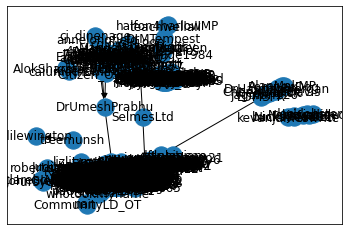

In [76]:
nx.draw_networkx(G)

In [77]:
nx.write_gexf(G, 'rp_before_network.gexf')

## First wave

In [78]:
users = first_wave_rp['user'].tolist()
replies = first_wave_rp['reply_to_user'].tolist()

In [79]:
# Creating adjadency list for network graph cration
adj_list = [] 

for i in range(len(users)):
    adj_list.append(users[i]+' '+replies[i].replace(',',' '))

adj_list[0]

'BrynSeiriol RobinMillarMP'

In [80]:
# Writing adjacency list to textfile

textfile = open("first_wave_rp_adjlist_rp.txt", "w")

for element in adj_list:
    textfile.write(element + "\n")
textfile.close()

In [81]:
# Importing adjacency list to directed graph
G = nx.Graph()
G = nx.read_adjlist('first_wave_rp_adjlist_rp.txt', create_using = nx.DiGraph())
nx.set_node_attributes(G, labels, "party")

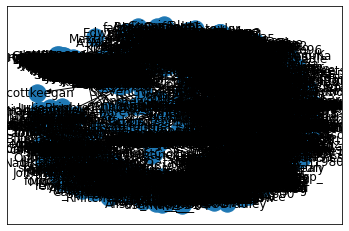

In [82]:
nx.draw_networkx(G)

In [83]:
nx.write_gexf(G, 'rp_first_wave_network.gexf')

## After first wave

In [84]:
users = after_first_rp['user'].tolist()
replies = after_first_rp['reply_to_user'].tolist()

In [85]:
# Creating adjadency list for network graph cration
adj_list = [] 

for i in range(len(users)):
    adj_list.append(users[i]+' '+replies[i].replace(',',' '))

adj_list[0]

'kathryn_gillett RobinMillarMP'

In [86]:
# Writing adjacency list to textfile

textfile = open("after_first_rp_adjlist_rp.txt", "w")

for element in adj_list:
    textfile.write(element + "\n")
textfile.close()

In [87]:
# Importing adjacency list to directed graph
G = nx.Graph()
G = nx.read_adjlist('after_first_rp_adjlist_rp.txt', create_using = nx.DiGraph())
nx.set_node_attributes(G, labels, "party")

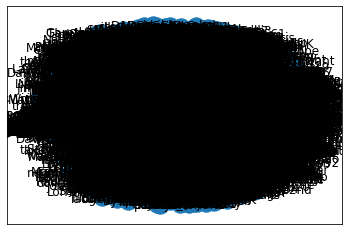

In [88]:
nx.draw_networkx(G)

In [89]:
nx.write_gexf(G, 'rp_after_first_network.gexf')

In [166]:
df_sen = pd.read_csv('tweet_sentiment.csv', dtype={'id':'str'})

In [167]:
df_sen = df_sen.sort_values(by=['id'])
tweets = tweets.sort_values(by=['id'])
#tweets

In [171]:
sen = df_sen['sentiment'].tolist()
tweets['sentiment'] = sen

In [ ]:
df_sen = pd.read_csv('tweet_sentiment.csv', dtype={'id':'str'})
df_sen = df_sen.sort_values(by=['id'])
tweets = tweets.sort_values(by=['id'])
sen = df_sen['sentiment'].tolist()
tweets['sentiment'] = sen

In [172]:
tweets

,text,public_metrics,in_reply_to_user_id,created_at,id,referenced_tweets,author_id,conversation_id,author,in_reply_to_user,__twarc,withheld,user,sentiment
7362,@cj_dinenage @ChildrensComm @NHSEngland And au...,"{'retweet_count': 6, 'reply_count': 3, 'like_c...",383238347,2019-10-10 13:20:38+00:00,1182284806446551041,"[{'type': 'replied_to', 'id': '118228149622641...",269965177,1182281496226418688,{'profile_image_url': 'https://pbs.twimg.com/p...,{'profile_image_url': 'https://pbs.twimg.com/p...,{'url': 'https://api.twitter.com/2/tweets/sear...,NaN,TwittleyJules,Negative
7005,@cj_dinenage @ChildrensComm @NHSEngland And au...,"{'retweet_count': 6, 'reply_count': 3, 'like_c...",383238347,2019-10-10 13:20:38+00:00,1182284806446551041,"[{'type': 'replied_to', 'id': '118228149622641...",269965177,1182281496226418688,"{'description': 'Mother of sons, writer of stu...","{'description': 'Gosport MP, mum, wife. RT ≠ e...",{'url': 'https://api.twitter.com/2/tweets/sear...,NaN,TwittleyJules,Negative
7361,@TwittleyJules @cj_dinenage @ChildrensComm @NH...,"{'retweet_count': 8, 'reply_count': 3, 'like_c...",269965177,2019-10-10 13:38:36+00:00,1182289327113621506,"[{'type': 'replied_to', 'id': '118228480644655...",331178901,1182281496226418688,{'profile_image_url': 'https://pbs.twimg.com/p...,{'profile_image_url': 'https://pbs.twimg.com/p...,{'url': 'https://api.twitter.com/2/tweets/sear...,NaN,KeeleyMP,Negative
7004,@TwittleyJules @cj_dinenage @ChildrensComm @NH...,"{'retweet_count': 8, 'reply_count': 3, 'like_c...",269965177,2019-10-10 13:38:36+00:00,1182289327113621506,"[{'type': 'replied_to', 'id': '118228480644655...",331178901,1182281496226418688,{'description': 'Labour MP for Worsley & Eccle...,"{'description': 'Mother of sons, writer of stu...",{'url': 'https://api.twitter.com/2/tweets/sear...,NaN,KeeleyMP,Negative
7360,@TwittleyJules @cj_dinenage @ChildrensComm @NH...,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",269965177,2019-10-10 13:41:21+00:00,1182290019698008068,"[{'type': 'replied_to', 'id': '118228480644655...",1095754783191896064,1182281496226418688,{'profile_image_url': 'https://pbs.twimg.com/p...,{'profile_image_url': 'https://pbs.twimg.com/p...,{'url': 'https://api.twitter.com/2/tweets/sear...,NaN,AutismMH,Neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7444,@SteveBarclay @DHSCgovuk @NHSEngland Stop harm...,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",269788397,2022-07-26 06:08:19+00:00,1551811633952997377,"[{'type': 'replied_to', 'id': '154443852042043...",1543742706010185728,1544438520420438016,{'profile_image_url': 'https://pbs.twimg.com/p...,{'profile_image_url': 'https://pbs.twimg.com/p...,{'url': 'https://api.twitter.com/2/tweets/sear...,NaN,avyetgotone,Negative
7443,@SteveBarclay @DHSCgovuk @NHSEngland @SteveBar...,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",269788397,2022-07-26 06:56:05+00:00,1551823655935565825,"[{'type': 'replied_to', 'id': '154443852042043...",4891618599,1544438520420438016,{'profile_image_url': 'https://pbs.twimg.com/p...,{'profile_image_url': 'https://pbs.twimg.com/p...,{'url': 'https://api.twitter.com/2/tweets/sear...,NaN,londontenniscoa,Negative
7442,@SteveBarclay @DHSCgovuk @NHSEngland Let us ac...,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",269788397,2022-07-26 08:57:56+00:00,1551854318222966785,"[{'type': 'quoted', 'id': '1551853949703045121...",376191717,1544438520420438016,{'profile_image_url': 'https://pbs.twimg.com/p...,{'profile_image_url': 'https://pbs.twimg.com/p...,{'url': 'https://api.twitter.com/2/tweets/sear...,NaN,prog_alli_asap,Neutral
7441,@SteveBarclay @DHSCgovuk @NHSEngland @SteveBar...,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",269788397,2022-07-26 09:01:17+00:00,1551855164616761344,"[{'type': 'quoted', 'id': '1551853949703045121...",376191717,1544438520420438016,{'profile_image_url': 'https://pbs.twimg.com/p...,{'profile_image_url': 'https://pbs.twimg.com/p...,{'url': 'https://api.twitter.com/2/tweets/sear...,NaN